# Graph search


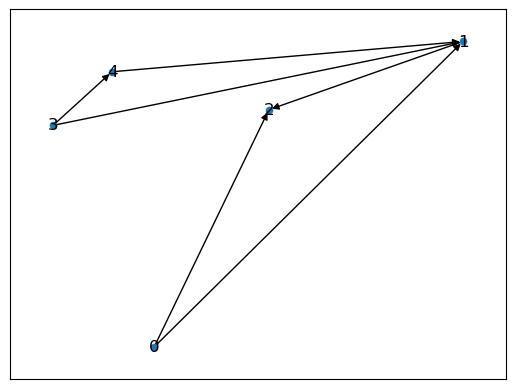

In [63]:
# importing the networkx as nx
import networkx as nx
# Generate a random graph with 50 nodes and 0.1 probabaility that edge exists between any two nodes
G = nx.erdos_renyi_graph(5, 0.1, seed=123, directed=True) 
import matplotlib.pyplot as plt # We need matplotlib pyplot for this purpose
pos = nx.random_layout(G) # To get the coordinates of nodes
nx.draw_networkx(G, with_labels=True, node_size=20, pos=pos) # We specify the graph, position, etc.

In [64]:
def search(G, s):
    s = 1
    mark = {n:False for n in G.nodes}; mark[s] = True
    pred = {n:"NA" for n in G.nodes}; pred[s] = "0"
    order = {n:"NA" for n in G.nodes}; order[s] = 0
    Q = [s]
    while Q:
        i = Q.pop(0) # First in first out - Breadth-first search
        for j in G.successors(i):
            if mark[j] == False:
                mark[j] = True
                pred[j] = i
                order[j] = order[i] + 1
                Q.append(j)  
    return mark, pred, order    

In [65]:
mark, pred, order  = search(G, s)

{0: 'NA', 1: '0', 2: 1, 3: 'NA', 4: 'NA'}

# Topological ordering

In [83]:
def topological_ordering(G):
    inDegree = {i: 0 for i in G.nodes}
    order = {n:"NA" for n in G.nodes}
    for l in G.edges:
        inDegree[l[1]] += 1
    count = 1
    Q = []
    for n in G.nodes:
        if inDegree[n] == 0:
            Q.append(n)
    while Q:
        i = Q.pop(0)
        order[i] = count
        count += 1
        for j in G.successors(i):
            inDegree[j] -= 1
            if inDegree[j] == 0:
                Q.append(j)
    if count < len(G.nodes):
        print("network has cycles")
    else:
        print("network is acyclic")
        return order
        

In [84]:
order = topological_ordering(G)
print(order)

network is acyclic
{0: 1, 1: 4, 2: 5, 3: 2, 4: 3}
